<a href="https://colab.research.google.com/github/fxnnxc/Movie_Sentiment_Classification/blob/master/Movie_sentiment_analysis_of_word_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Frequency Research 

In [0]:
# Import data
import matplotlib.pyplot as plt
import pandas as pd 
import re

data = pd.read_csv('/content/drive/My Drive/MovieSentiment/IMDB Dataset.csv')

In [0]:
# Preprocessing
from nltk.stem import PorterStemmer

# Cleansing
def clean_text(string):
  string = re.sub(pattern= '<[^>]*>', repl='', string=string)  # 태그 제거
  string = re.sub(pattern= '[^\w\s]',  repl='', string=string)  # 특수문자 제거
  return string

# Stemming
def stemming_text(string):
  s = PorterStemmer()
  string = string.split()
  string = " ".join([s.stem(w) for w in string])
  return string

def category(v):
  if v =='positive': 
    return 1
  else:
    return 0

# Preprocessing
for i,d in enumerate(data['review']):
  string = d.lower()
  string = clean_text(string)
  #string = stemming_text(string)
  data.iloc[i, 0] =  string


In [0]:
import re

word_dict = {}

number = 0 
for d in data['review']:
  sent = d.split(' ')
  for w in sent:
      if w in word_dict:
        word_dict[w][1] +=1
      else:
        word_dict[w] = [number, 1]
        number+=1

In [0]:
# Number of Sentences S
# Number of Classes N

# Assumes there are more than 100 sentencces
S = len(data)
low  = 0.05*S
high = 1.0*S

word_dict2 = {}
number = 0
for w in word_dict:
  if low < word_dict[w][1] < high:
    word_dict2[w] = word_dict[w]
    word_dict2[w][0] = number
    number+=1

print(len(word_dict))
print(len(word_dict2))


223234
450


In [0]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def category(v):
  if v =='positive': 
    return 1
  else:
    return 0

y = np.array(list(map(category, data['sentiment'])))
x = np.zeros((len(data), len(word_dict2)))

# Make X
for i, d in enumerate(data['review']):
  sent = d.split(' ')
  for w in sent:
      try:
        index  = word_dict2[w][0]
        x[i, index] +=1   
      except:
        pass

# Normalize

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
print(f"X:{x.shape}")
print(f"y:{y.shape}")

X:(50000, 450)
y:(50000,)


In [0]:
# Models 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3,random_state=0)


svc = LinearSVC(random_state=0, tol=1e-5, verbose=1)
gaunb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()

# Training 


svc.fit(X_train, y_train).decision_function(X_test)
print(f"SVC Accuracy: {accuracy_score(svc.predict(X_test),y_test)}")
gaunb.fit(X_train, y_train)
print(f"GNB Accuracy: {accuracy_score(gaunb.predict(X_test),y_test)}")
dt.fit(X_train, y_train)
print(f"DT Accuracy: {accuracy_score(dt.predict(X_test),y_test)}")
rf.fit(X_train, y_train)
print(f"RF Accuracy: {accuracy_score(rf.predict(X_test),y_test)}")

[LibLinear]SVC Accuracy: 0.8283333333333334
GNB Accuracy: 0.7903333333333333
DT Accuracy: 0.6966666666666667
RF Accuracy: 0.7990666666666667


In [0]:
# Training result with many conditions

import matplotlib.pyplot as plt
import pandas as pd

string = """|0.001S ~ S|10959|0.865|0.732|0.721|0.849|
|0.002S ~ S|6769|0.870|0.748|0.718|0.844|
|0.003S ~ S|5042|0.873|0.763|0.718|0.844|
|0.004S ~ S|4052|0.874|0.779|0.716|0.844|
|0.005S ~ S|3355|0.874|0.778|0.711|0.841|
|0.006S ~ S|2911|0.874|0.788|0.715|0.838|
|0.007S ~ S|2592|0.872|0.788|0.715|0.833|
|0.008S ~ S|2307|0.870|0.785|0.713|0.833|
|0.009S ~ S|2095|0.868|0.789|0.713|0.836|
|0.010S ~ S|1901|0.868|0.789|0.715|0.834|
|0.011S ~ S|1751|0.868|0.796|0.712|0.833|
|0.012S ~ S|1635|0.866|0.799|0.710|0.831|
|0.013S ~ S|1529|0.869|0.803|0.708|0.832|
|0.014S ~ S|1426|0.866|0.808|0.709|0.834|
|0.015S ~ S|1346|0.864|0.810|0.708|0.827|
|0.016S ~ S|1272|0.861|0.811|0.709|0.830|
|0.017S ~ S|1206|0.860|0.813|0.710|0.825|
|0.018S ~ S|1148|0.858|0.815|0.708|0.826|
|0.020S ~ S|1057|0.856|0.813|0.710|0.825|
|0.023S ~ S|947 |0.855|0.814|0.705|0.829|
|0.025S ~ S|876 |0.852|0.811|0.703|0.821|
|0.030S ~ S|739 |0.846|0.804|0.701|0.814|
|0.040S ~ S|550 |0.837|0.802|0.697|0.809|
|0.050S ~ S|450 |0.828|0.790|0.696|0.799|"""

data = pd.DataFrame(columns = ["Hypothesis", "Number of words","SVC","GNB","DT","RF" ])
for r in string.split('\n'):
  temp = []
  for s in r.split('|'):
      temp.append(s)
  print(temp)
  data =data.append(pd.Series(temp[1:-1],index=data.columns), ignore_index=True)


['', '0.001S ~ S', '10959', '0.865', '0.732', '0.721', '0.849', '']
['', '0.002S ~ S', '6769', '0.870', '0.748', '0.718', '0.844', '']
['', '0.003S ~ S', '5042', '0.873', '0.763', '0.718', '0.844', '']
['', '0.004S ~ S', '4052', '0.874', '0.779', '0.716', '0.844', '']
['', '0.005S ~ S', '3355', '0.874', '0.778', '0.711', '0.841', '']
['', '0.006S ~ S', '2911', '0.874', '0.788', '0.715', '0.838', '']
['', '0.007S ~ S', '2592', '0.872', '0.788', '0.715', '0.833', '']
['', '0.008S ~ S', '2307', '0.870', '0.785', '0.713', '0.833', '']
['', '0.009S ~ S', '2095', '0.868', '0.789', '0.713', '0.836', '']
['', '0.010S ~ S', '1901', '0.868', '0.789', '0.715', '0.834', '']
['', '0.011S ~ S', '1751', '0.868', '0.796', '0.712', '0.833', '']
['', '0.012S ~ S', '1635', '0.866', '0.799', '0.710', '0.831', '']
['', '0.013S ~ S', '1529', '0.869', '0.803', '0.708', '0.832', '']
['', '0.014S ~ S', '1426', '0.866', '0.808', '0.709', '0.834', '']
['', '0.015S ~ S', '1346', '0.864', '0.810', '0.708', '0.827'

In [0]:
data =data.astype({'SVC':float, 'GNB':float, 'DT':float, 'RF':float})

Text(0, 0.5, 'Accuracy')

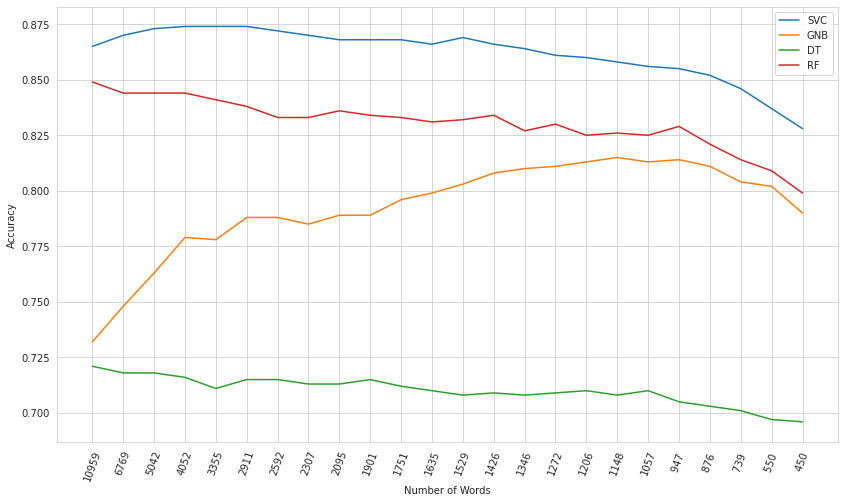

In [0]:
import seaborn as sns

index = data['Number of words']

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
for i in range(4):
  plt.plot(index, data[data.columns[2+i]])
plt.legend(data.columns[2:])
plt.xticks(rotation=70)
plt.xlabel('Number of Words')
plt.ylabel('Accuracy')

